# Page Rank

In [64]:
import numpy as np
import pandas as pd
from IPython.display import display
import scipy.linalg as sl
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [4]:
# random generator
np.random.permutation(12)

array([ 0,  2, 11, 10,  9,  3,  7,  5,  6,  1,  8,  4])

<img src="./fig/graph1.jpg" style="width: 300px;">

This is a directed graph. The 6 nodes represents 6 pages. An outgoing arrow from 1 to 3 means that there is a link to page 3 on page 1.

In [26]:
columns = [0,10,100, 1000,10000,20000]
index = range(1,7,1)
clicks = np.array([[0,3,21,165,1504,3012],[1,2,16,148,1391,2790],[0,3,27,271,2706,5424],[0,0,4,100,1096,2206],[0,2,22,155,1415,2745],[0,1,11,162,1889,3824]])
Clickdf = pd.DataFrame(clicks, index=index, columns=columns)

In [27]:
display(Clickdf)

,0,10,100,1000,10000,20000
1,0,3,21,165,1504,3012
2,1,2,16,148,1391,2790
3,0,3,27,271,2706,5424
4,0,0,4,100,1096,2206
5,0,2,22,155,1415,2745
6,0,1,11,162,1889,3824


In [28]:
Clicksum = np.sum(clicks,axis=0)
ClickPro = clicks/np.outer(np.ones(6),Clicksum)
CPdf = pd.DataFrame(ClickPro, index=index, columns=columns)
display(CPdf)

,0,10,100,1000,10000,20000
1,0.0,0.272727,0.207921,0.164835,0.150385,0.150592
2,1.0,0.181818,0.158416,0.147852,0.139086,0.139493
3,0.0,0.272727,0.267327,0.270729,0.270573,0.271186
4,0.0,0.000000,0.039604,0.099900,0.109589,0.110294
5,0.0,0.181818,0.217822,0.154845,0.141486,0.137243
6,0.0,0.090909,0.108911,0.161838,0.188881,0.191190


In [35]:
A = np.array([[0,1,0,0,1,1],[0, 0,1,0,1,0],[1,0,0,1,0,1],[0,1,0,0,0,1],[0,1,1,0,0,0],[0,0,1,1,1,0]])
print A

[[0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 0 0 1 0 1]
 [0 1 0 0 0 1]
 [0 1 1 0 0 0]
 [0 0 1 1 1 0]]


jth column means what links are on jth page.

For example, 1st column means the links on 1st page.

In [36]:
x0 = np.array([0.0,1,0,0,0,0])

$$Ax^{(0)}=\begin{bmatrix}0&1&0&0&1&1\\
0& 0&1&0&1&0\\
1&0&0&1&0&1\\
0&1&0&0&0&1\\
0&1&1&0&0&0\\
0&0&1&1&1&0
\end{bmatrix}\begin{bmatrix}
0\\ 1\\0\\0\\0\\0
\end{bmatrix}=\begin{bmatrix}
1\\ 0\\0\\1\\1\\0
\end{bmatrix}$$

In [38]:
def ColN(A): #normalize each column such that each column sums to 1
    n = A.shape[0]
    Colsum = np.sum(A,axis=0)
    return A/np.outer(np.ones(n),Colsum)

In [39]:
B = ColN(A)
print B

[[ 0.          0.33333333  0.          0.          0.33333333  0.33333333]
 [ 0.          0.          0.33333333  0.          0.33333333  0.        ]
 [ 1.          0.          0.          0.5         0.          0.33333333]
 [ 0.          0.33333333  0.          0.          0.          0.33333333]
 [ 0.          0.33333333  0.33333333  0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.5         0.33333333  0.        ]]


$$x^{(1)}=Bx^{(0)}=\begin{bmatrix}
0&1/3&0  &0&1/3&1/3\\
0&0  &1/3&0&1/3&0\\
1&0  &0  &1/2&0&1/3\\
0&1/3&0  &0&0&1/3\\
0&1/3&1/3&0&0&0\\
0&0  &1/3&1/2&1/3&0
\end{bmatrix}\begin{bmatrix}
0\\ 1\\0\\0\\0\\0
\end{bmatrix}=\begin{bmatrix}
1/3\\ 0\\0\\1/3\\1/3\\0
\end{bmatrix},\qquad x^{(2)}=B^2x^{(0)}=Bx^{(1)}=\begin{bmatrix}
0&1/3&0  &0&1/3&1/3\\
0&0  &1/3&0&1/3&0\\
1&0  &0  &1/2&0&1/3\\
0&1/3&0  &0&0&1/3\\
0&1/3&1/3&0&0&0\\
0&0  &1/3&1/2&1/3&0
\end{bmatrix}\begin{bmatrix}
1/3\\ 0\\0\\1/3\\1/3\\0
\end{bmatrix}=\begin{bmatrix}
1/9\\ 1/9\\1/2\\0\\0\\5/18
\end{bmatrix}$$

$B$ is a **probability transition matrix**. $x^{(0)}$ is the initial state vector (nonnegative entries, sums up to 1)

$1/9 = 1/3*0 + 1/3*0 + 1/3*1/3$

$\text{Prob(go to page 1) } = \sum_{j=1}^6\text{Prob(currently on page j) }\cdot b_{1j}$

In [11]:
def Anx(A,x0,n): #return A^n(x0)
    x = x0
    for i in range(n):
        x = np.dot(A,x)
    return x

In [54]:
x10 = Anx(B,np.array([0.5,0.5,0,0,0,0]),100)
print x10

[ 0.15454545  0.13636364  0.27272727  0.10909091  0.13636364  0.19090909]


$x^{(n)}=B^nx^{(0)}$: power method will find the eigenvector corresponding to the biggest (in magnitude) eigenvalue. For a probability transition matrix, its bigggest eigenvalue is 1.

In [30]:
e,v = np.linalg.eig(B)
print e

[ 1.00000000+0.j         -0.29773417+0.55217952j -0.29773417-0.55217952j
  0.18422489+0.j         -0.25542322+0.j         -0.33333333+0.j        ]


In [31]:
print v[:,0]

[-0.36048030+0.j -0.31807085+0.j -0.63614170+0.j -0.25445668+0.j
 -0.31807085+0.j -0.44529919+0.j]


In [33]:
print v[:,0]/sum(v[:,0])

[ 0.15454545-0.j  0.13636364-0.j  0.27272727-0.j  0.10909091-0.j
  0.13636364-0.j  0.19090909-0.j]


<img src="./fig/graph2.jpg" style="width: 400px;">

The cluster of Pages 1,2,3 has no outgoing links to the cluster of Pages 4, 5, 6, so once a surfer exits cluster 4,5,6, the surfer will be "trapped" in cluster 1,2,3 and the faractional page counts for pages 4,5,6 will approach zero, thereby assignning the pages in that cluster a page rank of 0.



In [41]:
A2 = np.array([[0,1,0,0,1,1],[0, 0,1,0,1,0],[1,1,0,1,0,1],[0,0,0,0,0,1],[0,0,0,0,0,0],[0,0,0,1,1,0]])
print A2

[[0 1 0 0 1 1]
 [0 0 1 0 1 0]
 [1 1 0 1 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]]


In [55]:
print B2

[[ 0.          0.5         0.          0.          0.33333333  0.33333333]
 [ 0.          0.          1.          0.          0.33333333  0.        ]
 [ 1.          0.5         0.          0.5         0.          0.33333333]
 [ 0.          0.          0.          0.          0.          0.33333333]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.5         0.33333333  0.        ]]


In [58]:
B2 = ColN(A2)
print Anx(B2,np.ones(6)/6,100)

[  2.00000000e-01   4.00000000e-01   4.00000000e-01   3.43664743e-40
   0.00000000e+00   2.06198846e-40]


Solution: with probability $\delta$ that the surfer chooses a link, and with probability $1-\delta$ that the surfer choose the next page at random. In the latter case, the surfer will choose any particular page at random with prob $\frac{1-\delta}{n}$.

Prob (pick i while on j) = $m_{ij} = \delta b_{ij}+\frac{1-\delta}{n}$

$M = \delta B+\frac{1-\delta}{n}\begin{bmatrix}
1&1&\cdots&1\\
1&1&\cdots&1\\
\vdots&\vdots&\ddots&\vdots\\
1&1&\cdots&1\\
\end{bmatrix}$

In [61]:
delta = 0.85 #google's choice
n = A2.shape[0]
M = delta*B2 + (1-delta)/n*np.outer(np.ones(n),np.ones(n))
print Anx(M,np.ones(6)/6, 100) #M^n(x0)

[ 0.18953882  0.33811336  0.36003533  0.0387573   0.025       0.04855519]


# Speed up Clustering with SVD (PCA)

In [66]:
n=100
P1 = 0.25*np.random.randn(n,2)
P2 = 0.1*np.random.randn(n,2) + np.array([1,1])
P3 = 0.2*np.random.randn(n,2) + np.array([3,2])

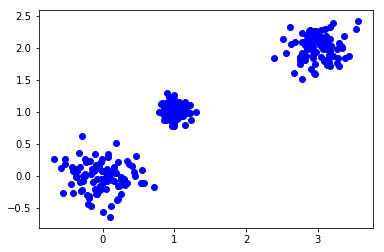

In [67]:
P = np.zeros([3*n,2])
P[:n,:] = P1
P[n:2*n,:] = P2
P[2*n:,:]=P3
plt.figure()
plt.scatter(P[:,0],P[:,1], color='b')
plt.show()

In [68]:
whitened = whiten(P)

In [69]:
codebook, distortion = kmeans(whitened, 3)

In [70]:
print codebook

[[ 0.78912779  1.19553443]
 [ 2.36476394  2.37193001]
 [-0.00891691 -0.02322682]]


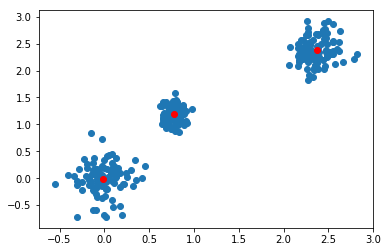

In [64]:
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()